In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Installing tensor flow

In [20]:
!pip install tensorflow

In [21]:

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import load_img

In [5]:
# Defining the path for train and test images

# Define the path for the training dataset

train_img_directory = pathlib.Path('/content/gdrive/MyDrive/CNN_assignment/Train')

# Define the path for the test dataset

test_img_directory = pathlib.Path('/content/gdrive/MyDrive/CNN_assignment/Test')



In [6]:
# Count the number of images in the train directory
image_count_train = len(list(train_img_directory.glob('*/*.jpg')))


print("Number of images in the training directory:", image_count_train)
image_count_test = len(list(test_img_directory.glob('*/*.jpg')))

# Print the count of images in the test directory
print("Number of images in the test directory:", image_count_test)

Number of images in the training directory: 2239
Number of images in the test directory: 118


Found 2239 files belonging to 9 classes.


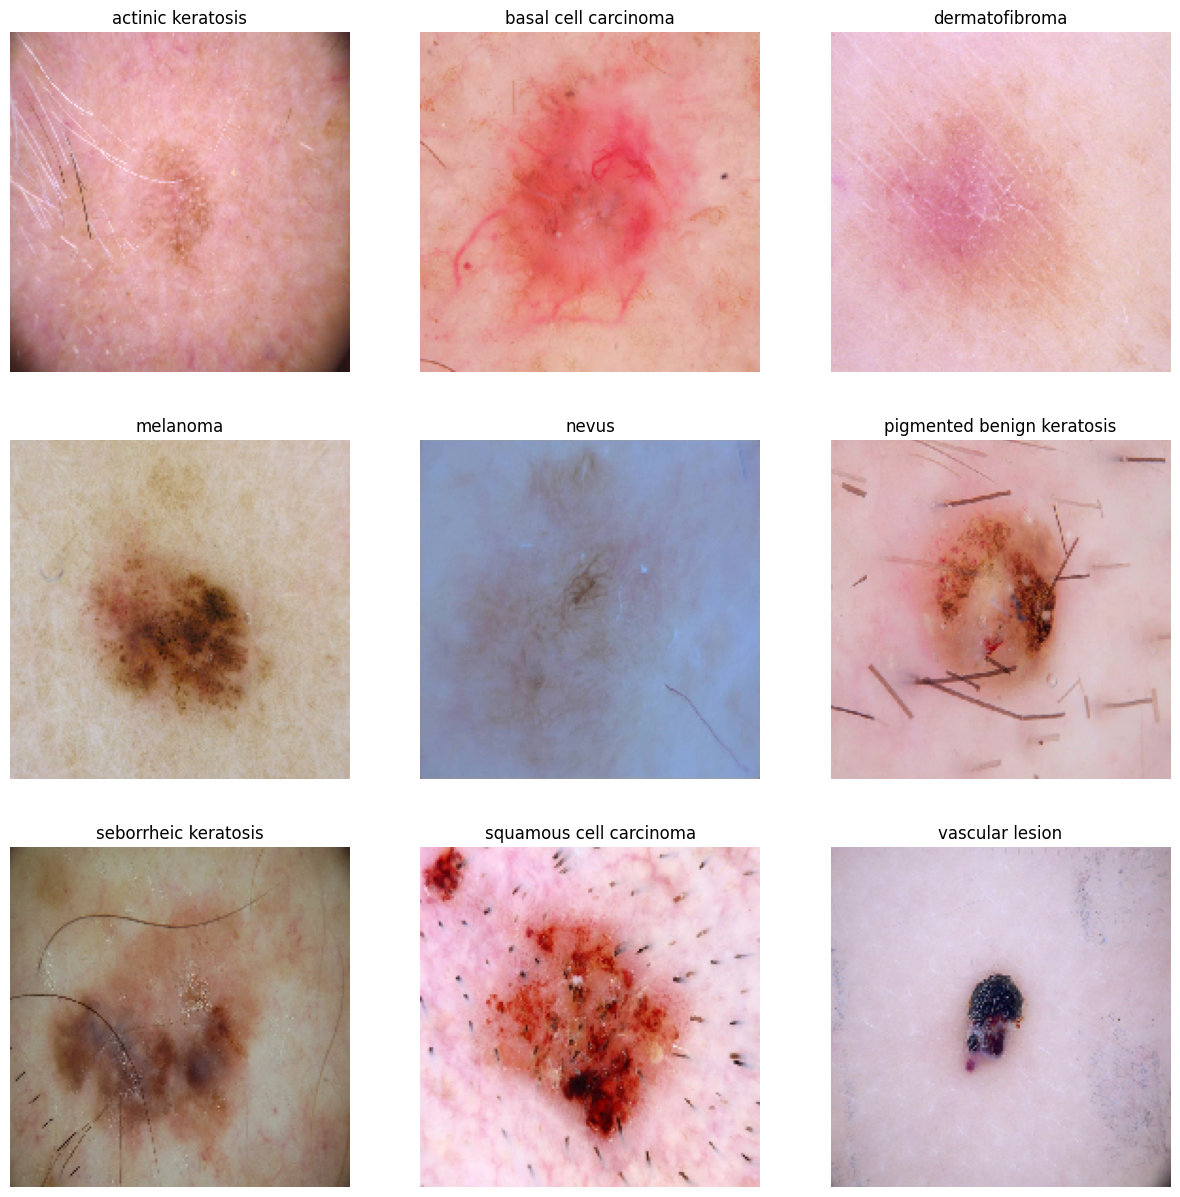

In [7]:

image_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_img_directory, batch_size=32, image_size=(180, 180), label_mode='categorical', seed=123
)

# Get the names of all the classes
class_names = image_dataset.class_names

# Dictionary to store image paths for each class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x: str(test_img_directory) + '/' + c + '/' + x, os.listdir(str(train_img_directory) + '/' + c)))

# Visualize an image from each class
plt.figure(figsize=(15, 15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(load_img(path_list[0], target_size=(180, 180)))
    plt.title(c)
    plt.axis("off")

In [8]:
# creating a function to count and analyze the images in each class

def class_distribution_count(directory):
    count = []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))]))

    # Get the names of the classes (sub-directories)
    sub_directory = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]

    df = pd.DataFrame(list(zip(sub_directory, count)), columns=['Class', 'No. of Images'])
    df = df.sort_values(by='No. of Images', ascending=True)
    return df

# Calling the function to get the class distributions and image count
class_distribution_df = class_distribution_count(train_img_directory)
class_distribution_df

,Class,No. of Images
4,seborrheic keratosis,77
1,dermatofibroma,95
3,actinic keratosis,114
0,vascular lesion,139
7,squamous cell carcinoma,181
6,nevus,357
8,basal cell carcinoma,376
2,melanoma,438
5,pigmented benign keratosis,462


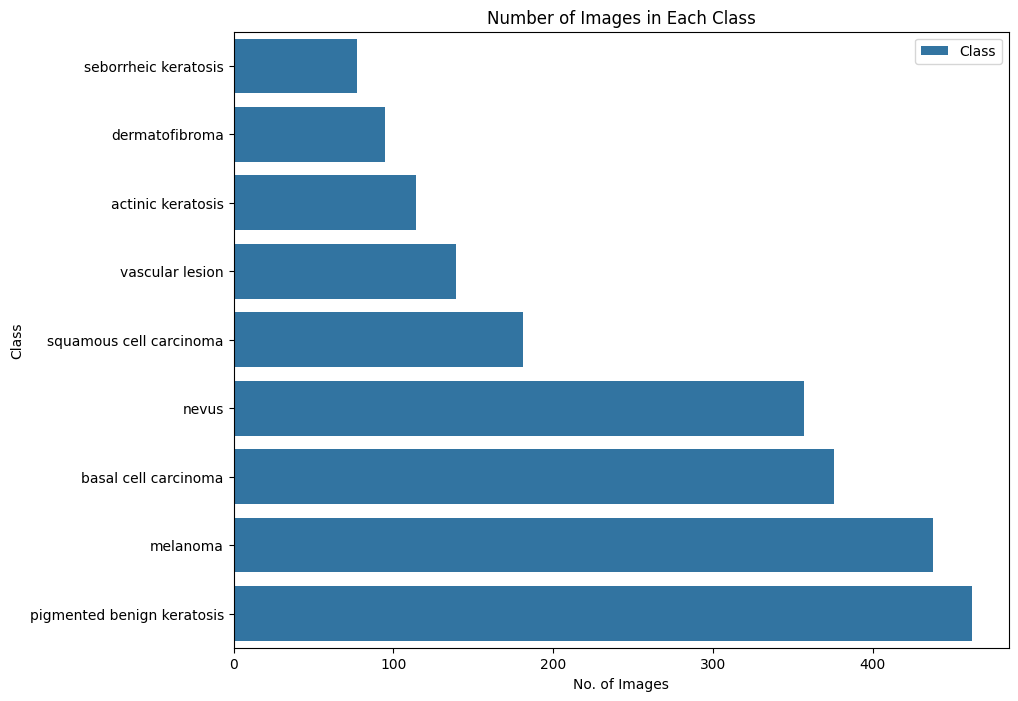

In [9]:
# Visualize the Number of Images in Each Class

import seaborn as sns
plt.figure(figsize=(10, 8))

sns.barplot(x="No. of Images", y="Class", data= class_distribution_df, label="Class")

# title to the plot
plt.title("Number of Images in Each Class")
plt.show()

In [10]:
# Installing Augmentor library
!pip install -q Augmentor

path_to_training_dataset = "/content/gdrive/MyDrive/CNN_assignment/Train/"
import Augmentor

# Loop through each class and perform data augmentation
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)

    # Generating and saving 500 augmented image samples for each class
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7923F953A7D0>: 100%|██████████| 500/500 [00:19<00:00, 25.45 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79242AC0EA10>: 100%|██████████| 500/500 [00:21<00:00, 23.56 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7923F953A350>: 100%|██████████| 500/500 [00:20<00:00, 24.20 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7924102542E0>: 100%|██████████| 500/500 [01:27<00:00,  5.72 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x79242AC1F9D0>: 100%|██████████| 500/500 [01:16<00:00,  6.57 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x792410211300>: 100%|██████████| 500/500 [00:18<00:00, 26.62 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7924102564A0>: 100%|██████████| 500/500 [00:42<00:00, 11.80 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x79241BF8F580>: 100%|██████████| 500/500 [00:19<00:00, 25.14 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x792410212F50>: 100%|██████████| 500/500 [00:21<00:00, 23.80 Samples/s]


In [11]:
# Count the Total Number of Augmented Images Generated by Augmentor
image_count_train = len(list(train_img_directory.glob('*/output/*.jpg')))
print("Total number of augmented images:", image_count_train)

Total number of augmented images: 4500


In [12]:
#Model Building and creating Train data set

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_img_directory, batch_size=32, image_size=(180, 180), label_mode='categorical',
    seed=123, subset="training", validation_split=0.2
)


Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [13]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_img_directory, batch_size=32, image_size=(180, 180), label_mode='categorical',
    seed=123, subset="validation", validation_split=0.2
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [14]:
# Define the appropriate number of processes that are free for working using AUTOTUNE
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache()
train_ds = train_ds.shuffle(1000)

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache()

# Prefetch data for validation
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [26]:
# CNN Model Architecture- Sequential allows you to create models layer-by-layer

model = Sequential()
model.add(layers.Rescaling(1./255, input_shape=(180, 180, 3)))

# 1st Convolutional layer
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# Dropout layer with 50% Fraction of the input units to drop
model.add(layers.Dropout(0.5))

# Flatten Layer: Convert multi-dimensional input tensors into a single dimension
model.add(layers.Flatten())

# Dense Layer: Fully connected layer with 128 units and ReLU activation
model.add(layers.Dense(128, activation='relu'))

# Dropout layer with 25% Fraction of the input units to drop
model.add(layers.Dropout(0.25))

model.add(layers.Dense(len(class_names), activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

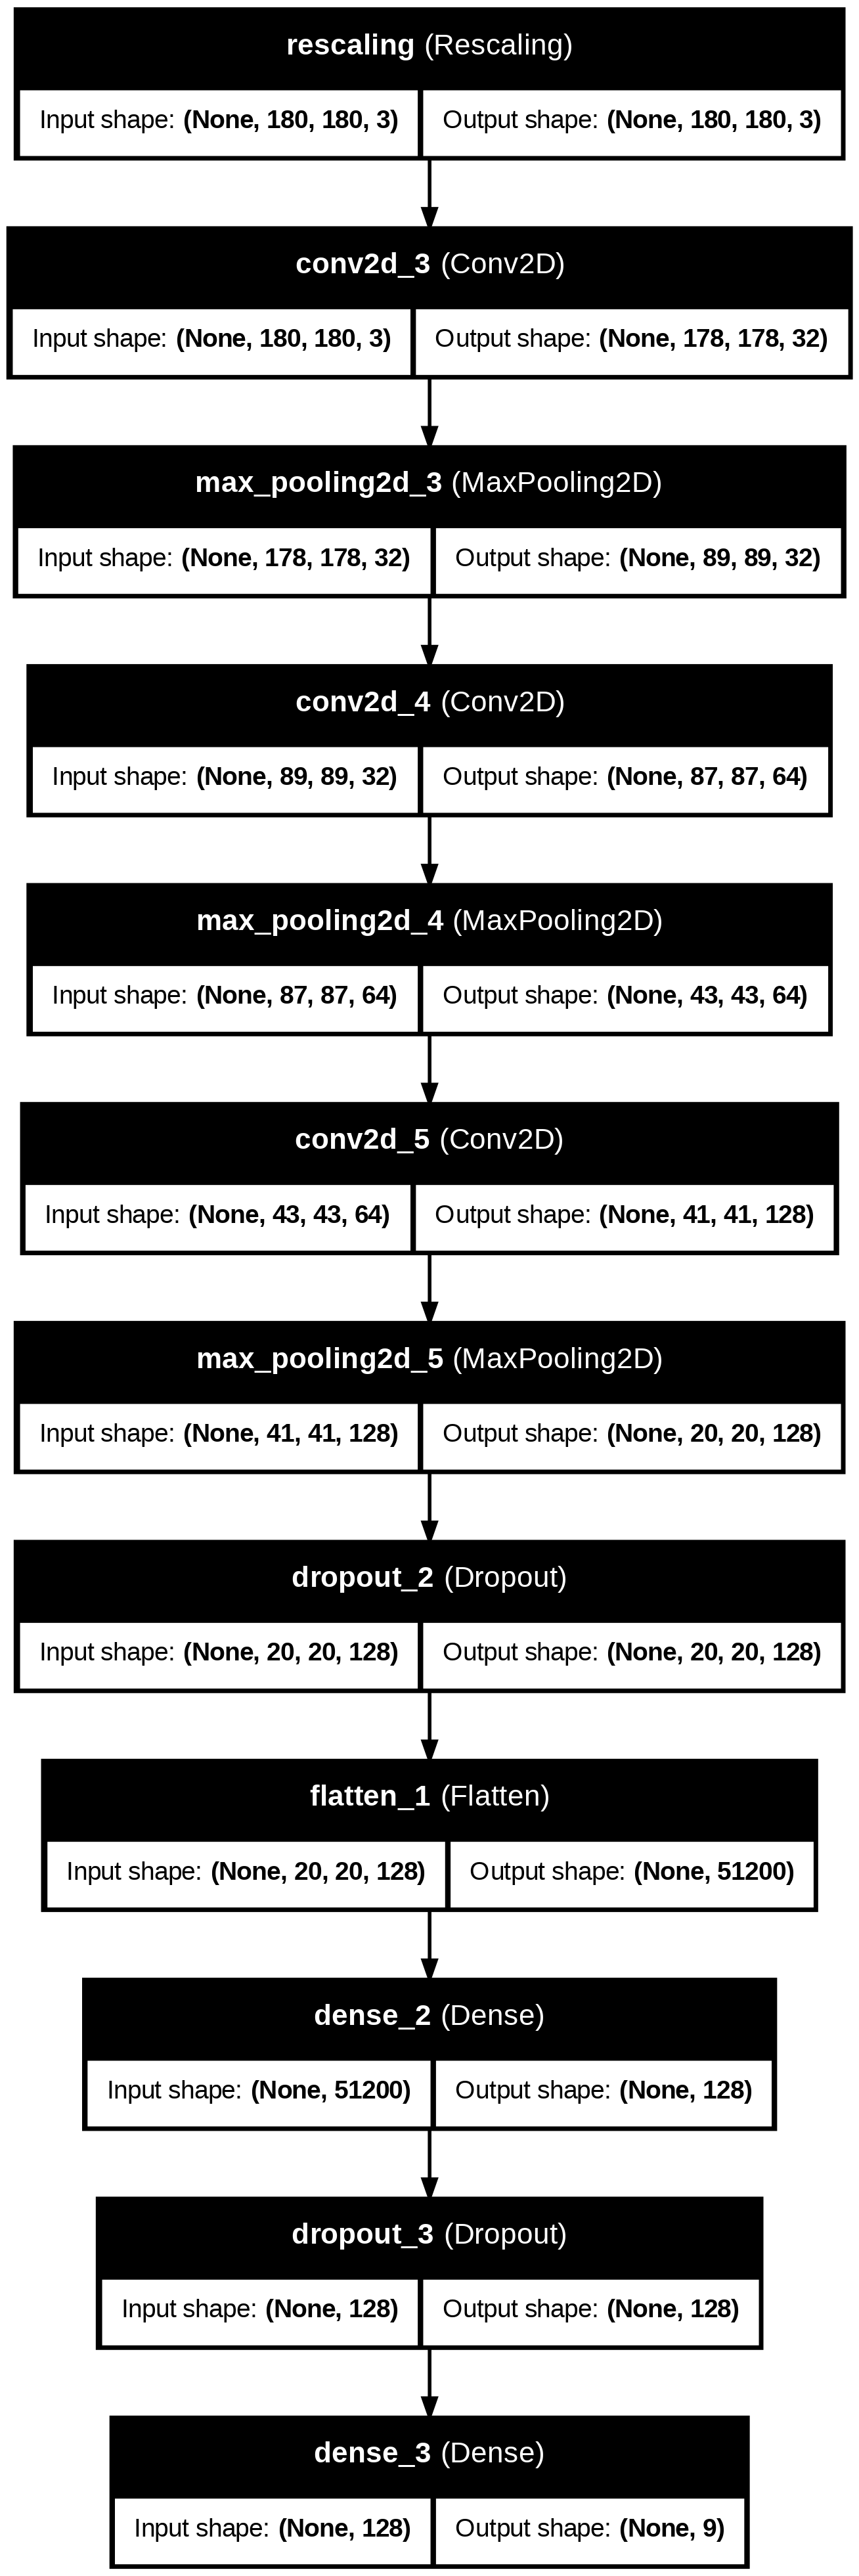

In [27]:
# Visualizing the CNN - Model Architecture

from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [29]:
# Compiling the Model Adam
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

checkpoint = ModelCheckpoint("model.keras", monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)

earlystop = EarlyStopping(monitor="val_accuracy", patience=5, mode="auto", verbose=1)

In [30]:
# Training the Model

# Set the number of training iterations as epochs
epochs = 30
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[checkpoint, earlystop])

Epoch 1/30
168/169 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1894 - loss: 2.2457
Epoch 1: val_accuracy improved from -inf to 0.42984, saving model to model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 60s 113ms/step - accuracy: 0.1902 - loss: 2.2426 - val_accuracy: 0.4298 - val_loss: 1.5833
Epoch 2/30
168/169 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3865 - loss: 1.6311
Epoch 2: val_accuracy improved from 0.42984 to 0.44915, saving model to model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.3867 - loss: 1.6305 - val_accuracy: 0.4491 - val_loss: 1.4234
Epoch 3/30
168/169 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4369 - loss: 1.4627
Epoch 3: val_accuracy improved from 0.44915 to 0.51002, saving model to model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.4371 - loss: 1.4621 - val_accuracy: 0.5100 - val_loss: 1.2691
Epoch 4/30
167/169 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5131 - loss: 1.2808
Epoch 4: val_accuracy improved from 0.51002 to 

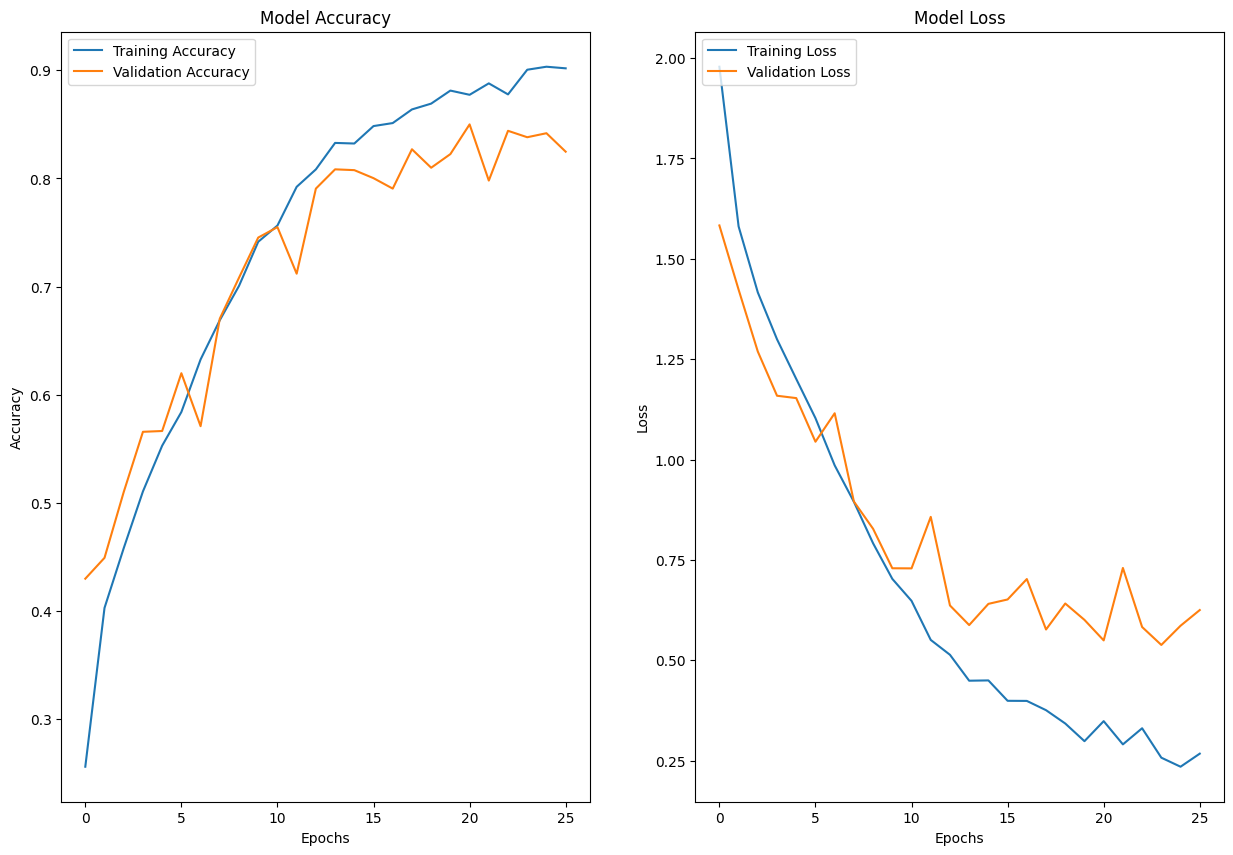

In [31]:
# Plot the Training Curves
epochs_range = range(earlystop.stopped_epoch + 1)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

# Plot Model Accuracy
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='upper left')

# Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper left')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Actual Class: basal cell carcinoma
Predicted Class: basal cell carcinoma


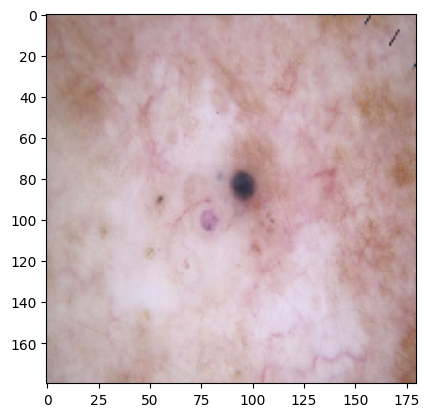

In [32]:
from glob import glob

test_image_path = os.path.join(test_img_directory, class_names[1], '*')
test_images = glob(test_image_path)
test_image = load_img(test_images[-1], target_size=(180, 180, 3))
plt.imshow(test_image)
plt.grid(False)
img = np.expand_dims(test_image, axis=0)

# Make predictions using the trained model
pred = model.predict(img)

pred = np.argmax(pred)

pred_class = class_names[pred]

print("Actual Class: " + class_names[1])
print("Predicted Class: " + pred_class)